# Bank Loan Prediction

### Business Objective:
To predict the Whether the customer will fall under default or not.


## Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [2]:
loan = pd.read_csv("bank_final.csv")

In [3]:
pd.options.display.max_columns = None #to show all the columns in dataset

In [4]:
loan.head(5)

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### 1. Understanding the data

In [5]:
loan.shape

(149999, 26)

The dataset is having 26 input variables and 150000 observations


In [6]:
loan.dtypes

Name                 object
City                 object
State                object
Zip                   int64
Bank                 object
BankState            object
CCSC                  int64
ApprovalDate         object
ApprovalFY            int64
Term                  int64
NoEmp                 int64
NewExist              int64
CreateJob             int64
RetainedJob           int64
FranchiseCode         int64
UrbanRural            int64
RevLineCr            object
LowDoc               object
ChgOffDate           object
DisbursementDate     object
DisbursementGross    object
BalanceGross         object
MIS_Status           object
ChgOffPrinGr         object
GrAppv               object
SBA_Appv             object
dtype: object

In [7]:
loan.describe()

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,49849.046527,401567.535270,2002.302889,93.010887,9.313749,1.319535,1.278455,3.685918,1655.999787,0.767905
std,31159.635854,256946.069805,5.212507,69.306154,78.956632,0.468125,10.958749,27.679464,9956.791183,0.633091
min,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20854.000000,236118.000000,1998.000000,57.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,48053.000000,447110.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,80003.000000,561612.000000,2006.000000,84.000000,8.000000,2.000000,0.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,2007.000000,480.000000,9999.000000,2.000000,3000.000000,9500.000000,91999.000000,2.000000


In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Name               149991 non-null  object
 1   City               149998 non-null  object
 2   State              149997 non-null  object
 3   Zip                149999 non-null  int64 
 4   Bank               149852 non-null  object
 5   BankState          149851 non-null  object
 6   CCSC               149999 non-null  int64 
 7   ApprovalDate       149999 non-null  object
 8   ApprovalFY         149999 non-null  int64 
 9   Term               149999 non-null  int64 
 10  NoEmp              149999 non-null  int64 
 11  NewExist           149999 non-null  int64 
 12  CreateJob          149999 non-null  int64 
 13  RetainedJob        149999 non-null  int64 
 14  FranchiseCode      149999 non-null  int64 
 15  UrbanRural         149999 non-null  int64 
 16  RevLineCr          1

In [9]:
loan.nunique()

Name                 140883
City                  15792
State                    51
Zip                   19372
Bank                   2932
BankState                52
CCSC                   1185
ApprovalDate           2548
ApprovalFY               23
Term                    342
NoEmp                   291
NewExist                  3
CreateJob               105
RetainedJob             167
FranchiseCode          1034
UrbanRural                3
RevLineCr                 7
LowDoc                    4
ChgOffDate             4234
DisbursementDate       1962
DisbursementGross     38747
BalanceGross              3
MIS_Status                2
ChgOffPrinGr          28116
GrAppv                 5986
SBA_Appv               8220
dtype: int64

In [10]:
#Keeping a copy of the original data
loan_original = loan.copy()
loan_original.head()

,Name,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### 2.  Handling The Missing VaLues

In [11]:
# Find Duplicate Rows
duplicate_rows_df = loan[loan.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (15, 26)


In [12]:
# Remove Duplicate Rows
loan = loan.drop_duplicates()
loan.shape

(149984, 26)

In [13]:
loan.isna().sum()

Name                      8
City                      1
State                     2
Zip                       0
Bank                    147
BankState               148
CCSC                      0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                23
LowDoc                    0
ChgOffDate           109518
DisbursementDate        225
DisbursementGross         0
BalanceGross              0
MIS_Status              866
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

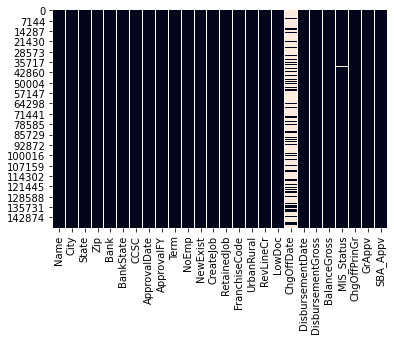

In [14]:
sns.heatmap(loan.isnull(), cbar=False)
plt.show();

In [15]:
#Dropping this Columns as ChgOffDate had only 70% of NaN Values and Name is not very important as it is just id 
loan.drop([ 'ChgOffDate' , 'Name'], axis = 1, inplace=True)


In [16]:
loan.shape

(149984, 24)

In [17]:
#Imputting na using mode for following columns
loan['MIS_Status'].fillna(loan['MIS_Status'].value_counts().index[0],inplace = True)
loan['Bank'].fillna(loan['Bank'].mode()[0],inplace = True)
loan['BankState'].fillna(loan['BankState'].mode()[0],inplace = True)
loan['RevLineCr'].fillna(loan['RevLineCr'].mode()[0],inplace = True)
loan.shape

(149984, 24)

In [18]:
loan.isna().sum()

City                   1
State                  2
Zip                    0
Bank                   0
BankState              0
CCSC                   0
ApprovalDate           0
ApprovalFY             0
Term                   0
NoEmp                  0
NewExist               0
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr              0
LowDoc                 0
DisbursementDate     225
DisbursementGross      0
BalanceGross           0
MIS_Status             0
ChgOffPrinGr           0
GrAppv                 0
SBA_Appv               0
dtype: int64

In [19]:
loan.dropna(axis = 0,inplace=True) #we dropped na from city,state and DisbursementDate

In [20]:
loan.shape

(149757, 24)

In [21]:
loan.head(5)

,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1,0,0,1,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1,7,7,1,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


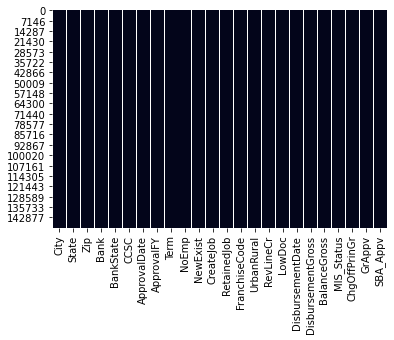

In [22]:
sns.heatmap(loan.isnull(), cbar=False);

We can see no white lines that means our data has no Missing Values now.

In [23]:
loan.columns

Index(['City', 'State', 'Zip', 'Bank', 'BankState', 'CCSC', 'ApprovalDate',
       'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [24]:
##Converting the Numeric Columns which are present as Object into Integers

loan['DisbursementGross'] = loan['DisbursementGross'].str.replace('[\$\,\.]','')
loan['BalanceGross'] = loan['BalanceGross'].str.replace('[\$\,\.]','')
loan['ChgOffPrinGr'] = loan['ChgOffPrinGr'].str.replace('[\$\,\.]','')
loan['GrAppv'] = loan['GrAppv'].str.replace('[\$\,\.]','')
loan['SBA_Appv'] = loan['SBA_Appv'].str.replace('[\$\,\.]','')


In [25]:
loan.head(10)

,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,N,Y,28-Feb-99,6000000,000,P I F,000,6000000,4800000
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,N,Y,31-May-97,4000000,000,P I F,000,4000000,3200000
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,N,N,31-Dec-97,28700000,000,P I F,000,28700000,21525000
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1,0,0,1,0,N,Y,30-Jun-97,3500000,000,P I F,000,3500000,2800000
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1,7,7,1,0,N,N,14-May-97,22900000,000,P I F,000,22900000,22900000
5,PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1,0,0,1,0,N,N,30-Jun-97,51700000,000,P I F,000,51700000,38775000
6,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,02-Jun-80,1980,45,45,2,0,0,0,0,N,N,22-Jul-80,60000000,000,CHGOFF,20895900,60000000,49999800
7,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2,0,0,1,0,N,Y,30-Jun-98,4500000,000,P I F,000,4500000,3600000
8,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2,0,0,1,0,N,N,31-Jul-97,30500000,000,P I F,000,30500000,22875000
9,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2,0,0,1,0,N,Y,30-Apr-97,7000000,000,P I F,000,7000000,5600000


In [26]:
#Remove the last two zeros ".00"
loan['DisbursementGross']= loan['DisbursementGross'].str[:-3]
loan['BalanceGross']= loan['BalanceGross'].str[:-3]
loan['ChgOffPrinGr']= loan['ChgOffPrinGr'].str[:-3]
loan['GrAppv']= loan['GrAppv'].str[:-3]
loan['SBA_Appv']= loan['SBA_Appv'].str[:-3]


In [27]:
loan.head(10)

,City,State,Zip,Bank,BankState,CCSC,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2,0,0,1,0,N,Y,28-Feb-99,60000,0,P I F,0,60000,48000
1,NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2,0,0,1,0,N,Y,31-May-97,40000,0,P I F,0,40000,32000
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1,0,0,1,0,N,N,31-Dec-97,287000,0,P I F,0,287000,215250
3,BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1,0,0,1,0,N,Y,30-Jun-97,35000,0,P I F,0,35000,28000
4,ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1,7,7,1,0,N,N,14-May-97,229000,0,P I F,0,229000,229000
5,PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,120,19,1,0,0,1,0,N,N,30-Jun-97,517000,0,P I F,0,517000,387750
6,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,02-Jun-80,1980,45,45,2,0,0,0,0,N,N,22-Jul-80,600000,0,CHGOFF,208959,600000,499998
7,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,84,1,2,0,0,1,0,N,Y,30-Jun-98,45000,0,P I F,0,45000,36000
8,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,297,2,2,0,0,1,0,N,N,31-Jul-97,305000,0,P I F,0,305000,228750
9,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,84,3,2,0,0,1,0,N,Y,30-Apr-97,70000,0,P I F,0,70000,56000


In [28]:
#Converting them to interger and converting the Date Columns into DateTime
loan['DisbursementGross']=loan['DisbursementGross'].astype(np.int64)
loan['BalanceGross']=loan['BalanceGross'].astype(np.int64)
loan['ChgOffPrinGr']=loan['ChgOffPrinGr'].astype(np.int64)
loan['GrAppv']=loan['GrAppv'].astype(np.int64)
loan['SBA_Appv']=loan['SBA_Appv'].astype(np.int64)
loan["ApprovalDate"] = pd.to_datetime(loan["ApprovalDate"])
loan["DisbursementDate"] = pd.to_datetime(loan["DisbursementDate"])

In [29]:
loan.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149757 entries, 0 to 149998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               149757 non-null  object        
 1   State              149757 non-null  object        
 2   Zip                149757 non-null  int64         
 3   Bank               149757 non-null  object        
 4   BankState          149757 non-null  object        
 5   CCSC               149757 non-null  int64         
 6   ApprovalDate       149757 non-null  datetime64[ns]
 7   ApprovalFY         149757 non-null  int64         
 8   Term               149757 non-null  int64         
 9   NoEmp              149757 non-null  int64         
 10  NewExist           149757 non-null  int64         
 11  CreateJob          149757 non-null  int64         
 12  RetainedJob        149757 non-null  int64         
 13  FranchiseCode      149757 non-null  int64   

## Variable Transformation

**1. MIS_Status**

In [30]:
#Changing the MIS_Status Column into numeric
# Chgoff: 1 and PIF: 0
loan['MIS_Status']= loan['MIS_Status'].map({'CHGOFF':1, 'P I F':0})

In [31]:
loan.MIS_Status.value_counts()

0    110831
1     38926
Name: MIS_Status, dtype: int64

**2. Franchise Code**

In [32]:
loan.FranchiseCode.value_counts()

1        81110
0        63394
78760      347
68020      147
50564      115
         ...  
67219        1
77890        1
75719        1
53162        1
23115        1
Name: FranchiseCode, Length: 1031, dtype: int64

In [33]:
len(loan.loc[loan['FranchiseCode']>1])

5253

In [34]:
loan['Franchisecode']=0
loan.loc[loan.FranchiseCode>1,'Franchisecode']=1

In [35]:
loan.Franchisecode.value_counts()

0    144504
1      5253
Name: Franchisecode, dtype: int64

In [36]:
loan.drop(['FranchiseCode'], axis = 1 , inplace = True)

**3. New Exist**

In [37]:
loan.NewExist.value_counts()

1    101648
2     47984
0       125
Name: NewExist, dtype: int64

In [38]:
loan.loc[(loan.NewExist !=1) & (loan.NewExist !=2),'NewExist'] = 1

In [39]:
loan.NewExist.value_counts()

1    101773
2     47984
Name: NewExist, dtype: int64

**4. Low Doc**

In [40]:
loan.loc[(loan.LowDoc !='N') & (loan.LowDoc !='Y') , 'LowDoc'] = 'N'
loan.LowDoc.value_counts()

N    137716
Y     12041
Name: LowDoc, dtype: int64

In [41]:
loan['LowDoc']=loan['LowDoc'].map({'N':0,'Y':1})

In [42]:
loan.LowDoc.head(5)

0    1
1    1
2    0
3    1
4    0
Name: LowDoc, dtype: int64

**5. RevLineCr**

In [43]:
loan["RevLineCr"] = loan.RevLineCr.map({"N":0,"Y":1,",":1,"T":1,"`":1, "0":0, "1":1})

In [44]:
loan.RevLineCr.value_counts()

0    95157
1    54600
Name: RevLineCr, dtype: int64

In [45]:
corelation = loan.corr()
corelation

,Zip,CCSC,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchisecode
Zip,1.000000,-0.071670,-0.095963,0.148247,0.014723,-0.080014,0.014370,-0.000329,-0.110185,0.006693,-0.012621,0.104609,0.001679,0.006566,0.024754,0.106396,0.116386,0.021201
CCSC,-0.071670,1.000000,0.578742,-0.259563,-0.040565,0.043608,0.019194,0.046231,0.499896,0.236065,-0.215317,-0.169578,-0.001835,0.114767,0.004930,-0.192590,-0.212552,-0.072054
ApprovalFY,-0.095963,0.578742,1.000000,-0.449343,-0.070261,0.025860,0.028186,0.067378,0.751178,0.407261,-0.277217,-0.212429,0.001856,0.157667,-0.018490,-0.264448,-0.306621,-0.095717
Term,0.148247,-0.259563,-0.449343,1.000000,0.047374,-0.061608,0.057023,-0.004853,-0.386023,-0.324347,-0.031433,0.493354,0.001336,-0.381301,-0.061129,0.541163,0.575480,0.077797
NoEmp,0.014723,-0.040565,-0.070261,0.047374,1.000000,-0.028537,0.023058,0.033362,-0.053582,-0.029232,-0.007963,0.068719,-0.000209,-0.019868,0.011230,0.070366,0.074781,0.007358
NewExist,-0.080014,0.043608,0.025860,-0.061608,-0.028537,1.000000,0.013530,-0.029894,0.024363,-0.019519,0.117614,-0.067563,0.003736,-0.030094,-0.003283,-0.056515,-0.054342,0.089595
CreateJob,0.014370,0.019194,0.028186,0.057023,0.023058,0.013530,1.000000,0.048595,0.018030,-0.027061,-0.034455,0.097033,-0.000306,-0.001443,0.036006,0.098467,0.124030,0.013453
RetainedJob,-0.000329,0.046231,0.067378,-0.004853,0.033362,-0.029894,0.048595,1.000000,0.058330,0.023152,-0.039359,0.030592,-0.000349,0.008583,0.013341,0.020344,0.021931,-0.005561
UrbanRural,-0.110185,0.499896,0.751178,-0.386023,-0.053582,0.024363,0.018030,0.058330,1.000000,0.373841,-0.351080,-0.221246,0.005043,0.194444,0.024021,-0.270874,-0.296344,-0.103660
RevLineCr,0.006693,0.236065,0.407261,-0.324347,-0.029232,-0.019519,-0.027061,0.023152,0.373841,1.000000,-0.223728,-0.194390,-0.001905,0.102896,-0.045829,-0.293323,-0.314566,-0.107398


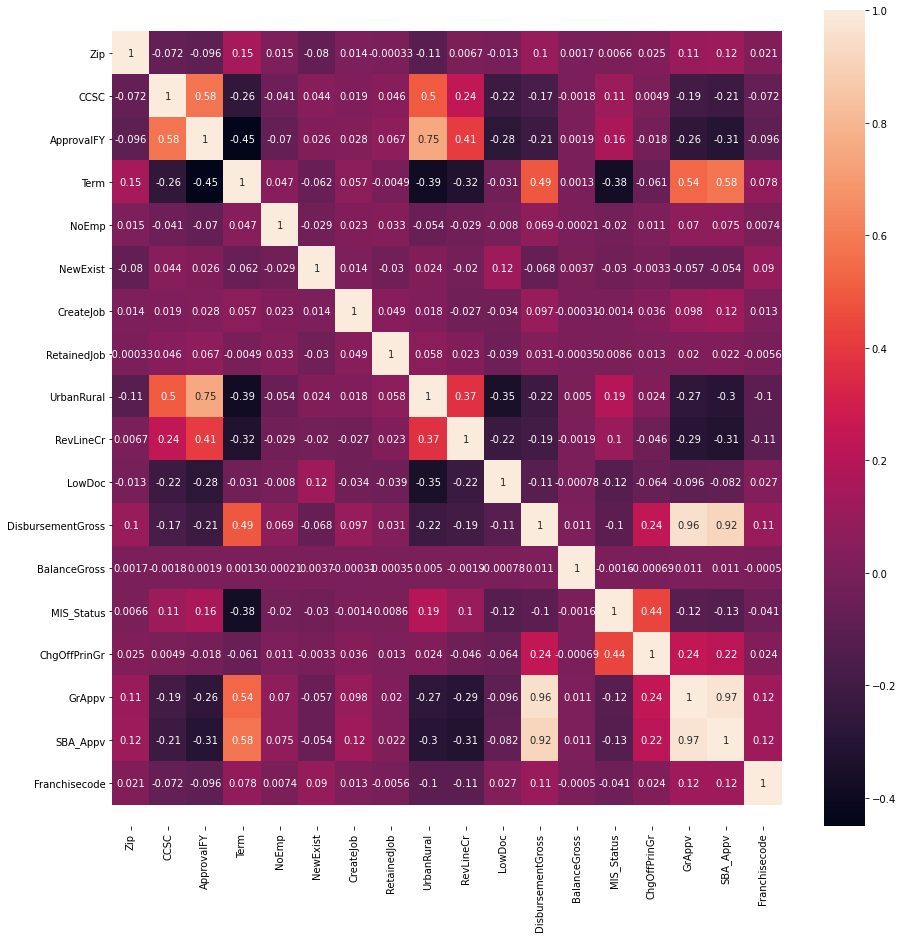

In [46]:
# Heatmap for correlation of numeric coloms
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corelation , xticklabels=corelation.columns , yticklabels=corelation.columns , annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
# ax.set(rc={'figure.figsize':(18,18)})

In [47]:
#import seaborn as sns
#corr=loan.iloc[:,:-4].corr()
#top_features=corr.index
#plt.figure(figsize=(20,20))
#sns.heatmap(loan[top_features].corr(),annot=True)

In [48]:
#Remove The correlated
#threshold=0.7

In [49]:
# find and remove correlated features
#def correlation(loan, threshold):
    #col_corr = set()  # Set of all the names of correlated columns
    #corr_matrix = loan.corr()
    #for i in range(len(corr_matrix.columns)):
        #for j in range(i):
            #if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                #colname = corr_matrix.columns[i]  # getting the name of column
                #col_corr.add(colname)
    #return col_corr

In [50]:
#correlation(loan.iloc[:,:-4],threshold)

In [51]:
#loan.drop(['UrbanRural'], axis = 1, inplace=True)

In [52]:
#loan.shape

## Univariate Plots

### 1. City

In [53]:
loan.City.value_counts()

LOS ANGELES    1898
NEW YORK       1577
MIAMI          1513
CHICAGO        1396
HOUSTON        1349
               ... 
MENARD            1
Watauga           1
PERRYOPOLIS       1
HIDALGO           1
New CVastle       1
Name: City, Length: 15780, dtype: int64

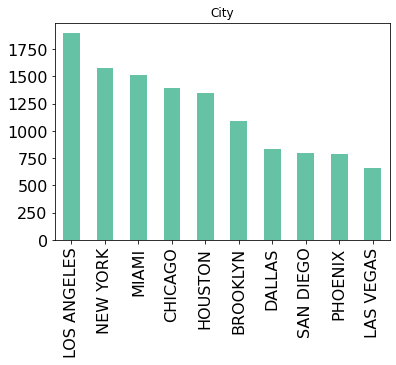

In [54]:
loan.City.value_counts().head(10).plot(kind='bar',title = 'City', cmap = 'Set2', fontsize = 16);

From the above Barplot we can Conclude that the `Los Angeles`,`NewYork` and `Miami` are the top 3 Borrower Cities 

### 2. State

In [55]:
loan.State.value_counts()

CA    19283
NY    12206
TX     9811
FL     9263
OH     7554
PA     6270
IL     6107
MI     5162
MA     5023
NJ     4545
GA     4195
WA     3441
UT     3072
WI     3037
AZ     3028
CO     2953
MN     2843
MD     2799
MO     2769
NC     2716
IN     2700
VA     2429
CT     2361
NH     1929
RI     1583
OR     1549
TN     1503
OK     1409
KY     1343
ID     1328
KS     1313
NV     1236
AL     1193
IA     1164
LA     1070
MS     1030
SC     1027
MT      934
ME      866
AR      833
VT      792
NM      667
NE      549
WV      494
DE      458
ND      454
HI      390
SD      330
WY      283
DC      234
AK      229
Name: State, dtype: int64

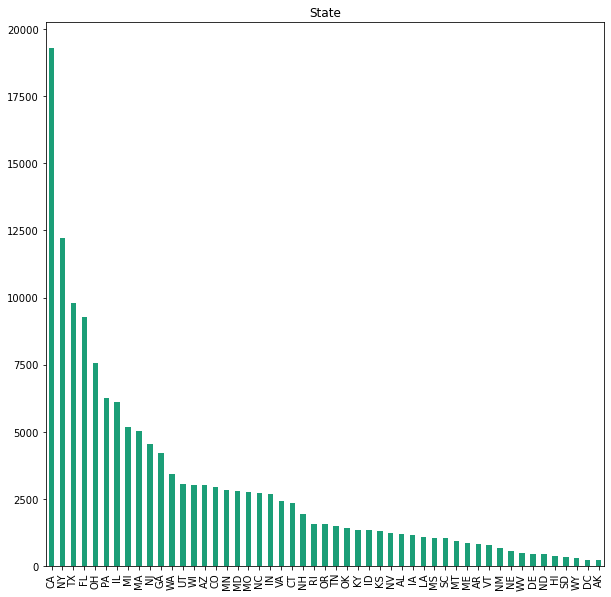

In [56]:
loan.State.value_counts().plot(kind = 'bar', title="State", figsize=(10,10), cmap= 'Dark2');

From the above Barplot we can Conclude that the `California`,`NewYork` and `Texas` are the top 3 Borrower's State

 ### 3. Bank

In [57]:
loan.Bank.value_counts()

BANK OF AMERICA NATL ASSOC        28116
CITIZENS BANK NATL ASSOC          13034
CAPITAL ONE NATL ASSOC            10610
JPMORGAN CHASE BANK NATL ASSOC    10349
WELLS FARGO BANK NATL ASSOC        6358
                                  ...  
FDIC/WILLISTON BASIN ST. BK           1
SOUTHEAST SDIC INC                    1
AMTRUST BANK, A DIVISION OF           1
CIT. ST. BK OF TAYLOR CNTY            1
BANK OF YATES CITY                    1
Name: Bank, Length: 2929, dtype: int64

In [58]:
len(loan.Bank.unique())

2929

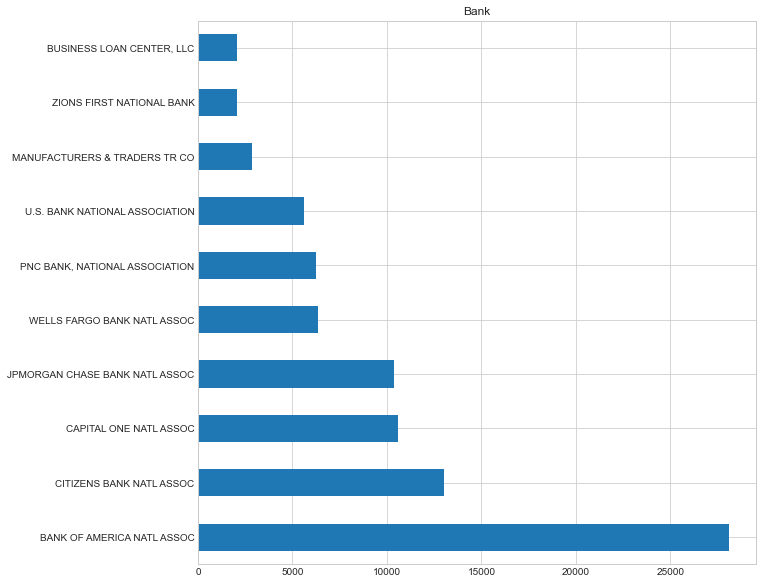

In [59]:
plt.style.use('seaborn-whitegrid')
loan.Bank.value_counts().head(10).plot.barh(title="Bank", figsize=(10,10));

From the above Barplot we can say that the `Bank OF America Natil Assoc`,`Citizens Bank Natil Assoc` and `Captial one Natil Assoc` are the top 3 Bank 

### 4. Bank State

In [60]:
loan.BankState.value_counts()

NC    26947
RI    14712
IL    12630
CA    12429
VA    11562
OH    10031
NY     6270
DE     5547
SD     4935
TX     4771
UT     3052
PA     2896
FL     2877
OR     1960
WI     1929
MN     1845
GA     1837
MO     1617
MA     1467
MD     1352
NJ     1101
CT     1042
AL     1034
CO     1013
WA      950
MI      897
IA      857
IN      787
MT      782
KS      774
OK      768
SC      716
DC      700
MS      681
NH      631
AR      605
KY      563
VT      516
NV      483
TN      478
LA      435
ND      421
AZ      414
NM      406
ID      400
NE      390
ME      356
WV      290
HI      285
WY      201
AK       70
PR       45
Name: BankState, dtype: int64

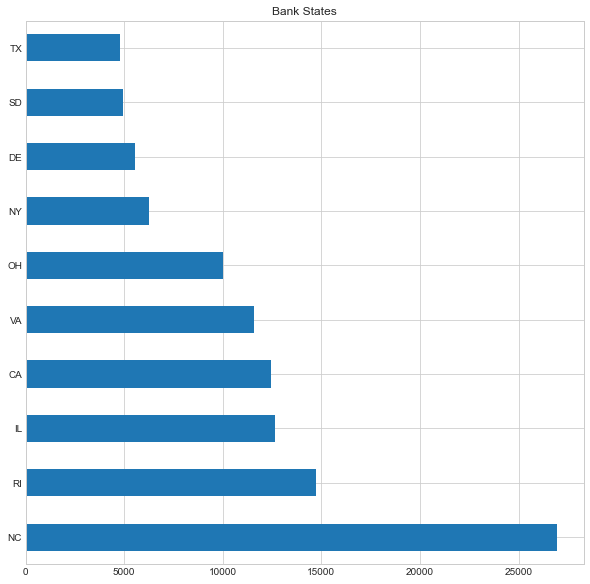

In [61]:
plt.style.use('seaborn-whitegrid')
loan.BankState.value_counts().head(10).plot.barh(title="Bank States", figsize=(10,10));

From the above barplot we can `North Carolina`, `Rhode Island` and `Illinois` are Top 3 Bank's State

### 5. CCSC

In [62]:
loan.CCSC.value_counts()

0         31707
722110     3390
722211     2888
811111     2620
561730     2165
          ...  
327113        1
213115        1
421220        1
331315        1
713920        1
Name: CCSC, Length: 1184, dtype: int64

In [63]:
len(loan.CCSC.unique())

1184

### 6. ApprovalDate and ApprovalFy

In [64]:
loan.ApprovalDate.value_counts()

1997-09-30    466
2006-03-17    425
2006-03-24    421
1997-04-01    418
2006-03-31    412
             ... 
1981-09-17      1
1980-06-18      1
1980-07-14      1
1981-10-02      1
1978-08-31      1
Name: ApprovalDate, Length: 2525, dtype: int64

In [65]:
len(loan.ApprovalDate.unique())

2525

In [66]:
loan.ApprovalFY.value_counts()

2006    55296
2005    33513
1997    23821
1998    22726
2004     5547
2007     3535
1984     1959
1983     1583
1982      524
1981      376
2003      259
1985      151
1980      132
2001      100
1979       98
1999       42
1978       37
2000       34
1972       21
1973        3
Name: ApprovalFY, dtype: int64

In [67]:
loan.ApprovalFY.unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985], dtype=int64)

In [68]:
loan.ApprovalFY.min()

1972

In [69]:
loan.ApprovalFY.max()

2007

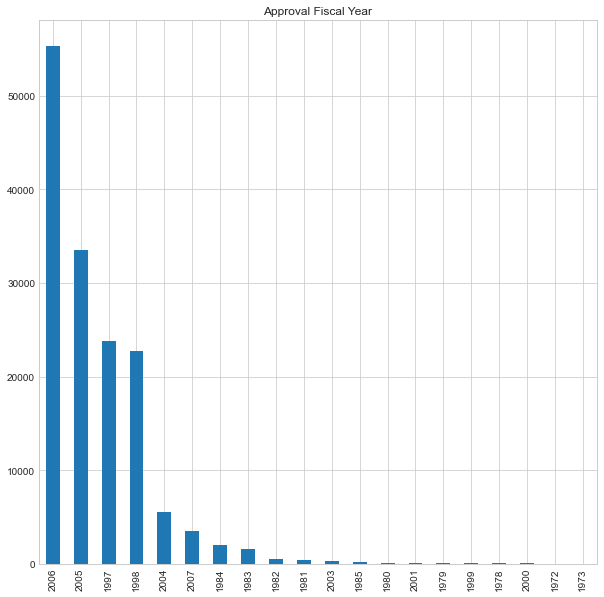

In [70]:
loan.ApprovalFY.value_counts().plot(kind="bar", title="Approval Fiscal Year", figsize=(10,10));

From the above barplot we see that `2006`, `2005` and `1997` are Top Approval Fiscal Year

### 7. Term

In [71]:
loan.Term.value_counts()

84     50171
60     14385
240     8702
120     7643
300     5192
       ...  
314        1
372        1
435        1
421        1
342        1
Name: Term, Length: 342, dtype: int64

In [72]:
len(loan.Term.unique())

342

In [73]:
loan.Term.min(),loan.Term.max()

(0, 480)

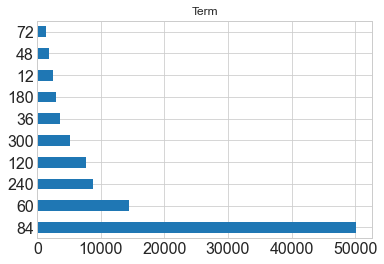

In [74]:
loan.Term.value_counts().head(10).plot(kind="barh", title = 'Term', fontsize=16);

### 8. NoEmp

In [75]:
loan.NoEmp.value_counts()

1       30787
2       25985
3       16568
4       13108
5       10286
        ...  
310         1
2100        1
750         1
1050        1
360         1
Name: NoEmp, Length: 291, dtype: int64

In [76]:
len(loan.NoEmp.unique())

291

In [77]:
loan.NoEmp.min(),loan.NoEmp.max()

(0, 9999)

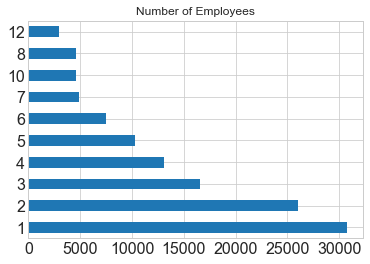

In [78]:
loan.NoEmp.value_counts().head(10).plot(kind="barh", title="Number of Employees", fontsize=16);

### 9.NewExist

In [79]:
loan.NewExist.value_counts()

1    101773
2     47984
Name: NewExist, dtype: int64

Here also There is data error : '0'

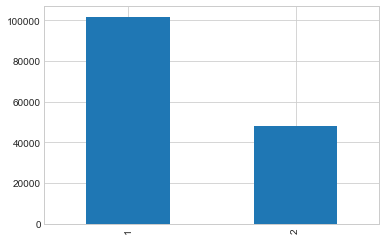

In [80]:
loan.NewExist.value_counts().plot(kind = 'bar');

From the above plot we can say there are more people with Existing Business

### 10. Create Job & Retained Job

In [81]:
loan.CreateJob.value_counts()

0      112870
1       11697
2        8934
3        3781
4        2530
        ...  
52          1
51          1
303         1
163         1
46          1
Name: CreateJob, Length: 105, dtype: int64

In [82]:
loan.CreateJob.min(),loan.CreateJob.max()

(0, 3000)

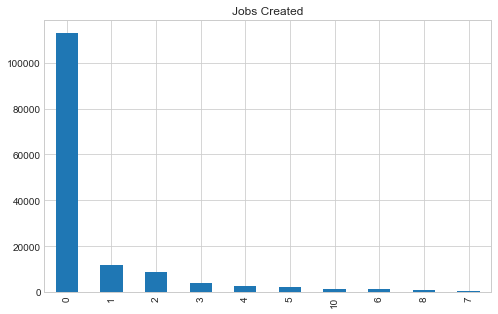

In [83]:
loan.CreateJob.value_counts().head(10).plot(kind="bar", title="Jobs Created",figsize = (8,5));

In [84]:
loan.RetainedJob.value_counts()

0      65667
1      18690
2      15505
3      10273
4       8055
       ...  
230        1
104        1
165        1
233        1
220        1
Name: RetainedJob, Length: 167, dtype: int64

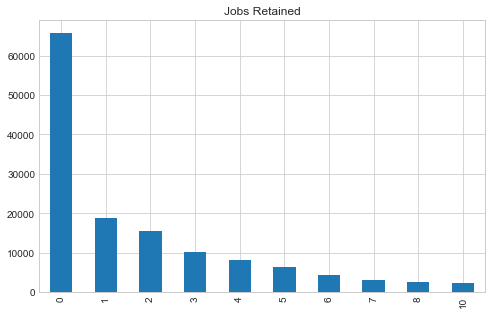

In [85]:
loan.RetainedJob.value_counts().head(10).plot(kind="bar" , title = 'Jobs Retained' , figsize =(8,5));

### 11. LowDoc

In [86]:
loan.LowDoc.value_counts()

0    137716
1     12041
Name: LowDoc, dtype: int64

Here there is unnecessary data error as 'c' and '1'

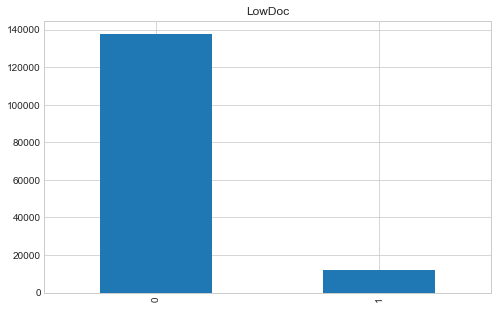

In [87]:
loan.LowDoc.value_counts().plot(kind = 'bar' , title = 'LowDoc' , figsize=(8,5));

### 12. Urban Rural

In [88]:
loan.UrbanRural.value_counts()

1    81724
0    51370
2    16663
Name: UrbanRural, dtype: int64

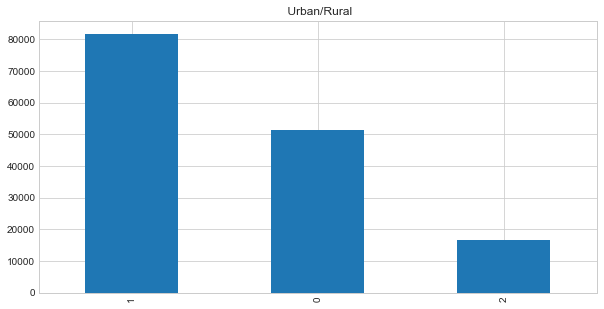

In [89]:
loan.UrbanRural.value_counts().plot(kind='bar' , title=' Urban/Rural' , figsize = (10,5));

From the above plot we can see the people are more from Urban Area.

### 13. RevLineCr

In [90]:
loan.RevLineCr.value_counts()

0    95157
1    54600
Name: RevLineCr, dtype: int64

There is a lot of Unnecessary data here

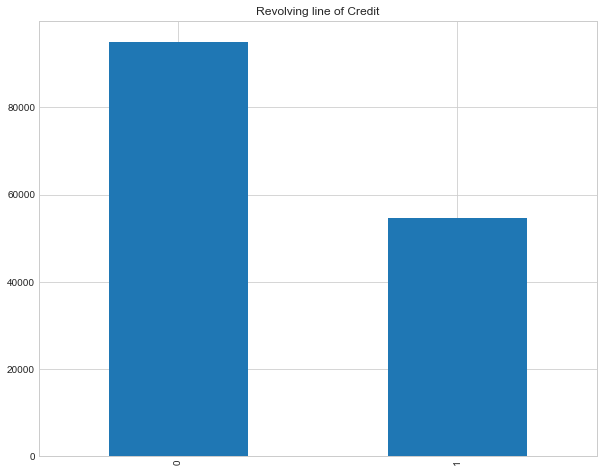

In [91]:
loan.RevLineCr.value_counts().plot(kind='bar', title = 'Revolving line of Credit', figsize = (10,8));

### 14. MIS_Status(Target Variable)  

In [92]:
loan.MIS_Status.value_counts()

0    110831
1     38926
Name: MIS_Status, dtype: int64

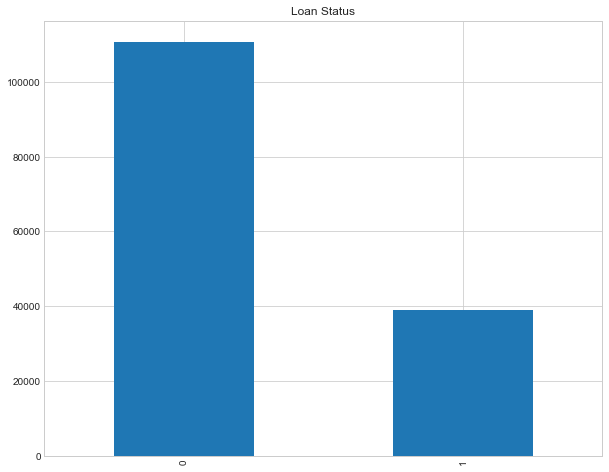

In [93]:
loan.MIS_Status.value_counts().plot(kind='bar' , title = 'Loan Status',figsize = (10,8));

We can see that there are 60% more people falling in PIF than Chgoff

### 15. Disbursement Date and DisbursementGross

In [94]:
loan.DisbursementDate.value_counts()

2006-05-31    6220
2006-03-31    6039
2006-04-30    5848
2006-06-30    5262
2006-02-28    4893
              ... 
1983-08-24       1
1998-07-10       1
1983-02-16       1
1979-09-27       1
1982-08-30       1
Name: DisbursementDate, Length: 1960, dtype: int64

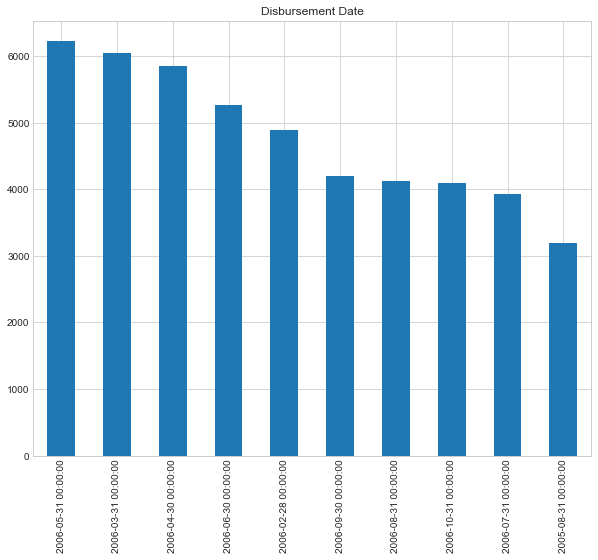

In [95]:
loan.DisbursementDate.value_counts().head(10).plot(kind = 'bar', title = 'Disbursement Date', figsize = (10,8));

In [96]:
loan.DisbursementGross.value_counts()

50000     10200
25000      6981
100000     6969
10000      5600
35000      3090
          ...  
119403        1
92796         1
144023        1
37571         1
89364         1
Name: DisbursementGross, Length: 38724, dtype: int64

In [97]:
loan.DisbursementGross.min(),loan.DisbursementGross.max()

(0, 4029520)

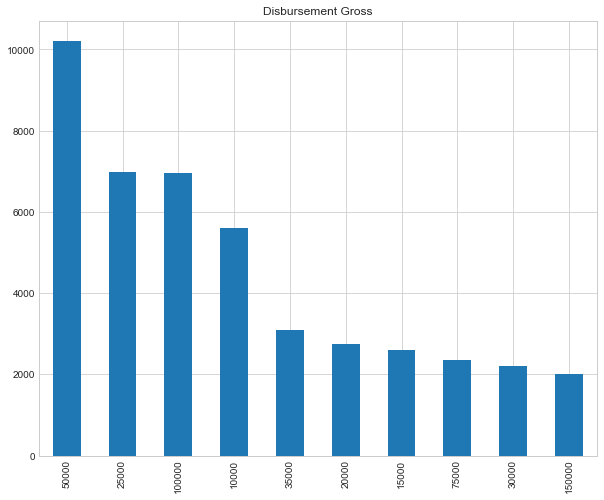

In [98]:
loan.DisbursementGross.value_counts().head(10).plot(kind = 'bar', title = 'Disbursement Gross', figsize = (10,8));

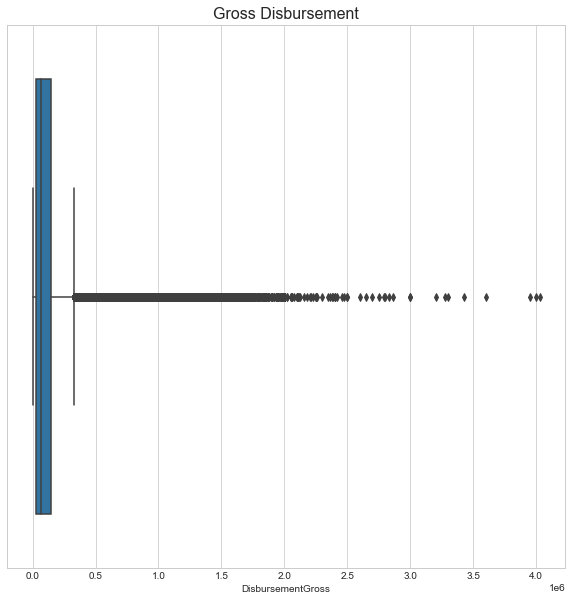

In [99]:
fig = plt.subplots(figsize=(10,10))
sns.boxplot(x="DisbursementGross", data=loan)
plt.title("Gross Disbursement", fontdict={'fontsize': 16});

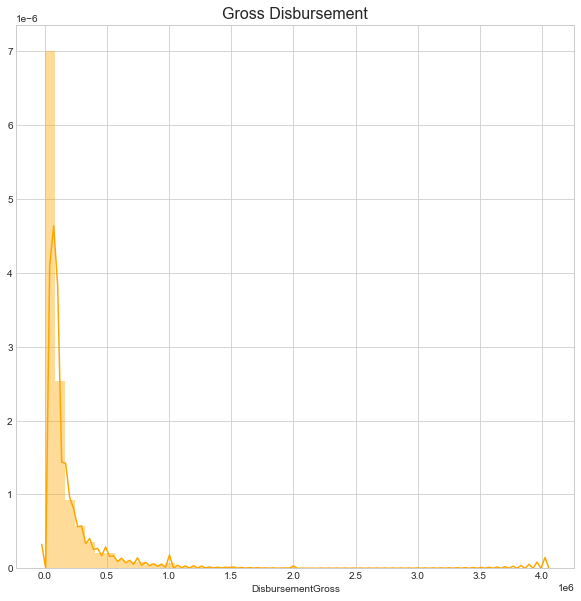

In [100]:
fig = plt.subplots(figsize=(10,10))
sns.distplot(loan.DisbursementGross, color="orange")
plt.title("Gross Disbursement", fontdict={'fontsize': 16});

### 16. Balance Gross

In [101]:
loan.BalanceGross.value_counts()

0         149755
827875         1
12750          1
Name: BalanceGross, dtype: int64

### 17. (ChgOffPrinGr)Charge off Amount

In [102]:
loan.ChgOffPrinGr.value_counts()

0         109578
10000        956
50000        794
25000        435
100000       399
           ...  
28509          1
34752          1
38850          1
63438          1
12614          1
Name: ChgOffPrinGr, Length: 28027, dtype: int64

In [103]:
loan.ChgOffPrinGr.min(),loan.ChgOffPrinGr.max()

(0, 1999999)

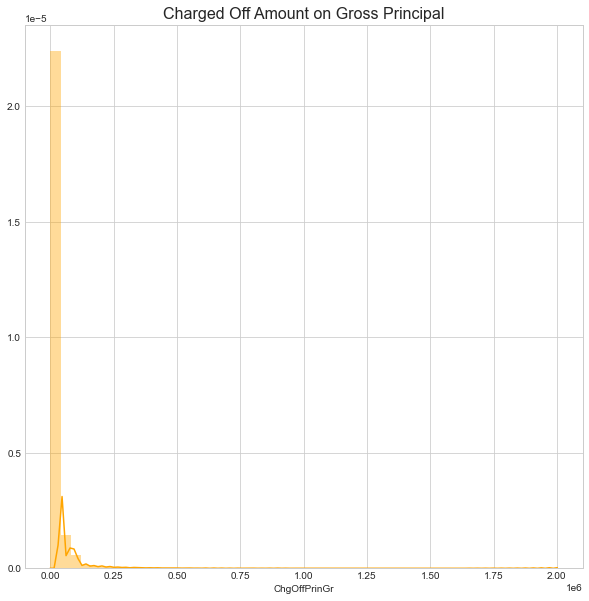

In [104]:
fig = plt.subplots(figsize=(10,10))
sns.distplot(loan.ChgOffPrinGr, color="orange")
plt.title("Charged Off Amount on Gross Principal", fontdict={'fontsize': 16});

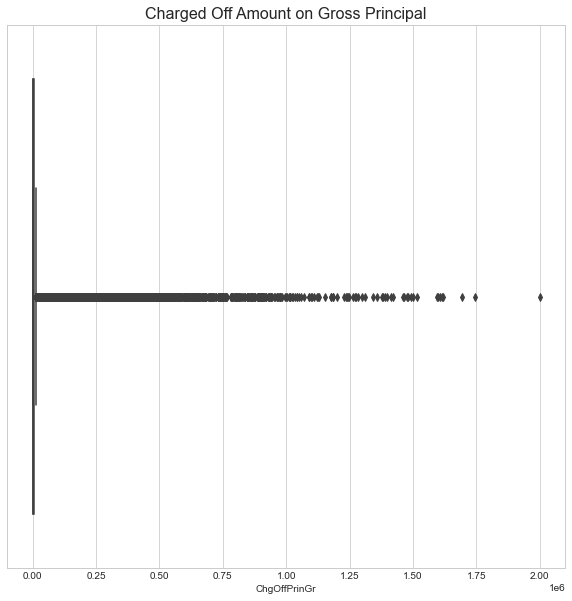

In [105]:
fig = plt.subplots(figsize=(10,10))
sns.boxplot(x="ChgOffPrinGr", data=loan)
plt.title("Charged Off Amount on Gross Principal", fontdict={'fontsize': 16});

### 18. (GrAppv)Gross Amount of loan approved by Bank

In [106]:
loan.GrAppv.value_counts()

50000     17477
25000     13250
10000     12571
100000    11103
20000      5431
          ...  
939000        1
293840        1
900200        1
19670         1
153525        1
Name: GrAppv, Length: 5984, dtype: int64

In [107]:
loan.GrAppv.min(),loan.GrAppv.max()

(200, 4000000)

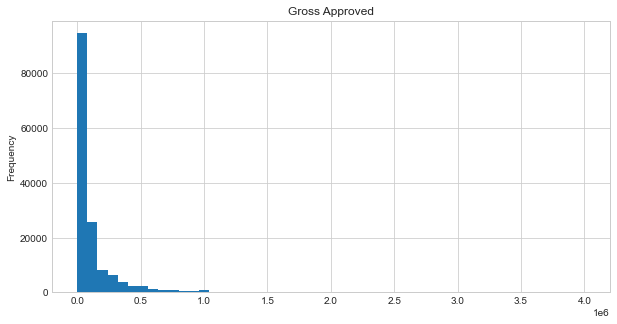

In [108]:
loan.GrAppv.plot(kind = 'hist', bins=50, figsize = (10,5), title="Gross Approved");

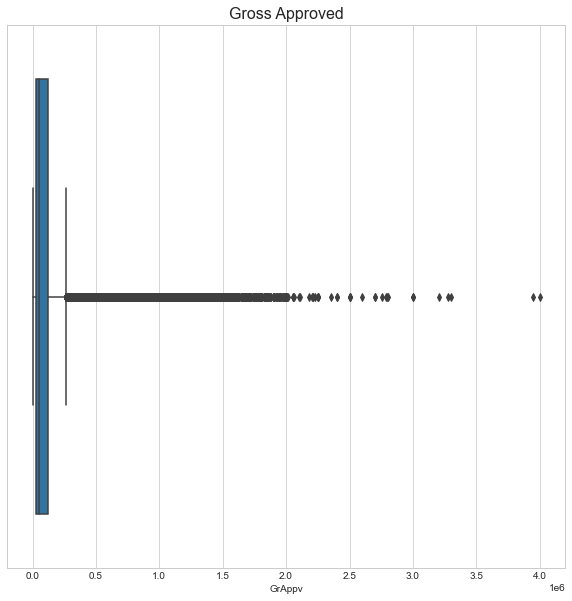

In [109]:
fig = plt.subplots(figsize=(10,10))
sns.boxplot(x="GrAppv", data=loan)
plt.title("Gross Approved", fontdict={'fontsize': 16});

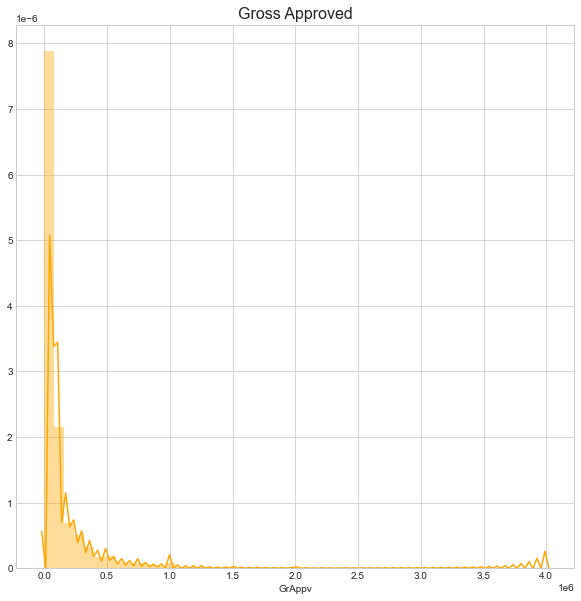

In [110]:
fig = plt.subplots(figsize=(10,10))
sns.distplot(loan.GrAppv, color="orange")
plt.title("Gross Approved", fontdict={'fontsize': 16});

### 19.  SBA_Appv

In [111]:
loan.SBA_Appv.value_counts()

25000     15045
5000      11885
12500     10820
50000      7751
10000      4656
          ...  
120075        1
68880         1
380296        1
24640         1
249142        1
Name: SBA_Appv, Length: 8213, dtype: int64

In [112]:
loan.SBA_Appv.min(),loan.SBA_Appv.max()

(100, 4000000)

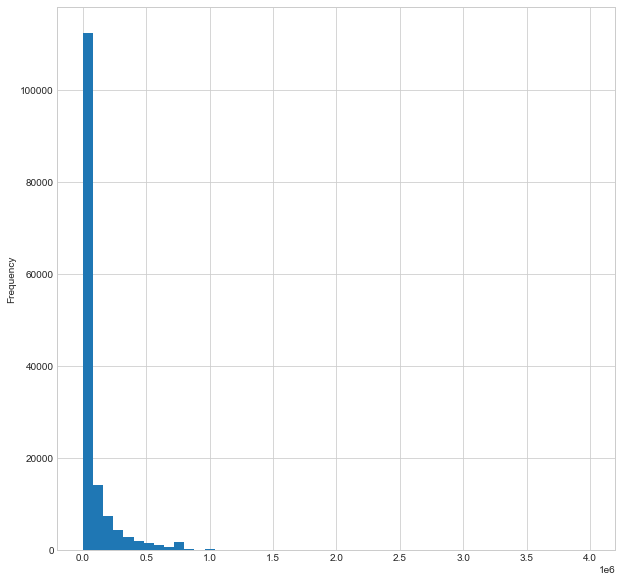

In [113]:
loan.SBA_Appv.plot(kind ='hist' , bins = 50, figsize =(10,10));

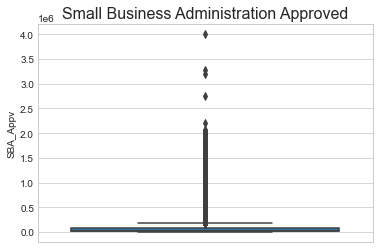

In [114]:
sns.boxplot(x = "SBA_Appv", data=loan, orient="vertical")
plt.title("Small Business Administration Approved", fontdict={'fontsize': 16});

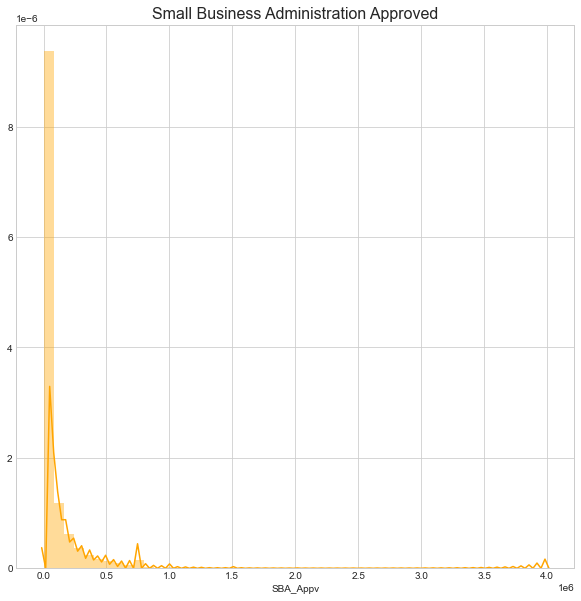

In [115]:
fig = plt.subplots(figsize=(10,10))
sns.distplot(loan.SBA_Appv, color="orange")
plt.title("Small Business Administration Approved", fontdict={'fontsize': 16});

## Bivariate Plots

#### Distribution of Numerical Features

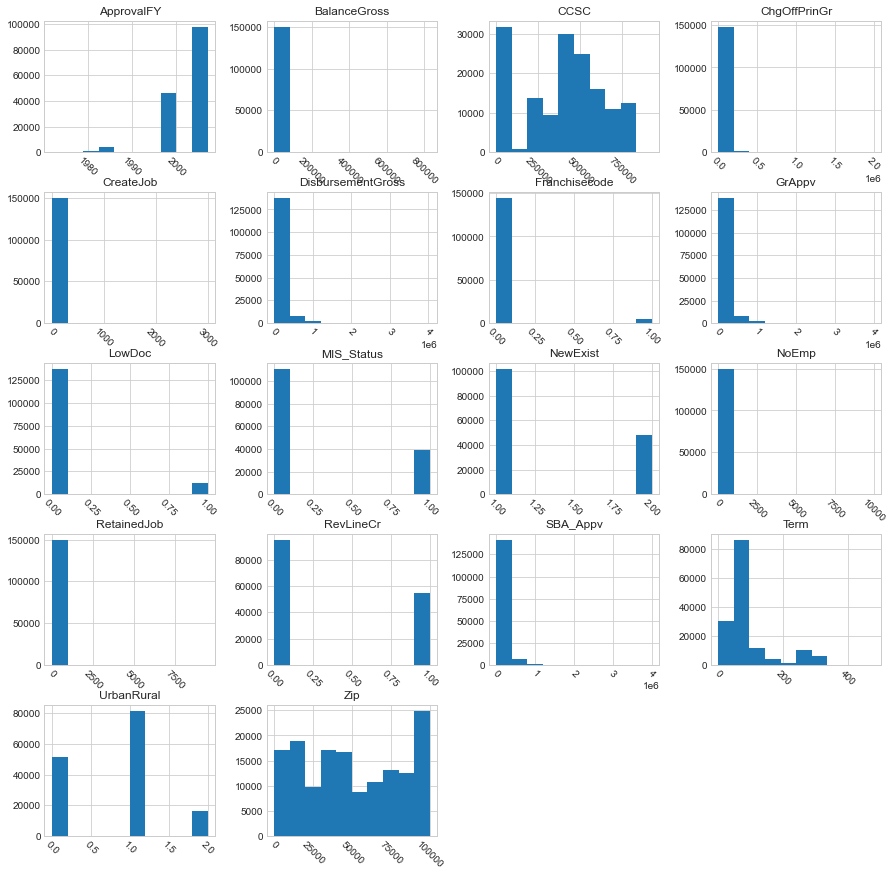

In [116]:
loan.hist(figsize=(15,15), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

#### Description of Categorical Feature

In [117]:
loan.describe(include=['object'])

,City,State,Bank,BankState
count,149757,149757,149757,149757
unique,15780,51,2929,52
top,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,NC
freq,1898,19283,28116,26947


### 1. Bank With Highest Gross Approval

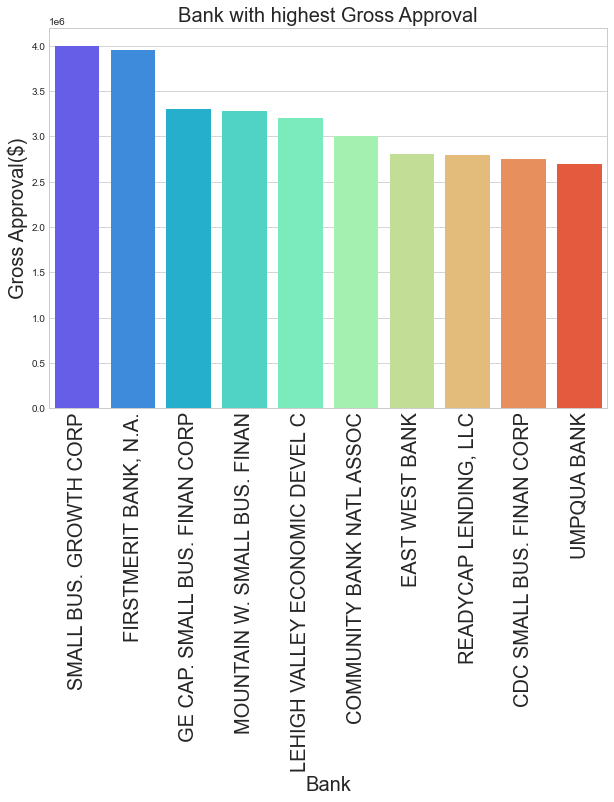

In [118]:
plot_gross = pd.DataFrame(loan.groupby(['Bank'])['GrAppv'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross = plot_gross[plot_gross['GrAppv'] > 0]  
plt.subplots(figsize=(10,7))
sns.barplot(x='Bank',y='GrAppv',data=plot_gross,palette='rainbow', )
plt.ylabel('Gross Approval($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('Bank', fontsize=20)
plt.title('Bank with highest Gross Approval', fontsize=20)
plt.show()

The Top 3 bank with highest Gross Approval amount are `SMALL BUS. GROWTH CORP`, `FIRSTMERIT BANK, N.A` and 
`GE CAP. SMALL BUS FINAN CORP`.

### 2. Bank State With Highest Gross Approval

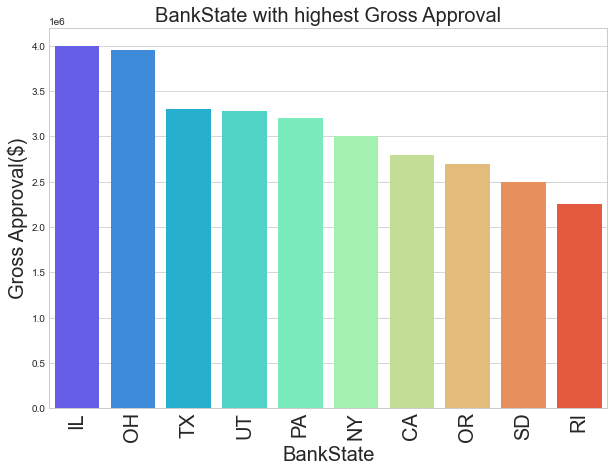

In [119]:
plot_gross1 = pd.DataFrame(loan.groupby(['BankState'])['GrAppv'].max().sort_values(ascending=False)[:10]).reset_index()
plot_gross1 = plot_gross1[plot_gross1['GrAppv'] > 0]  
plot_gross1.head(10)
plt.subplots(figsize=(10,7))
sns.barplot(x='BankState',y='GrAppv',data=plot_gross1,palette='rainbow', )
plt.ylabel('Gross Approval($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('BankState', fontsize=20)
plt.title('BankState with highest Gross Approval', fontsize=20)
plt.show()

The top 3 Bank States with highest Gross Approval are `Illinois` , `Ohio` and `Texas`

### 3. Urban/Rural with max Gross Approval

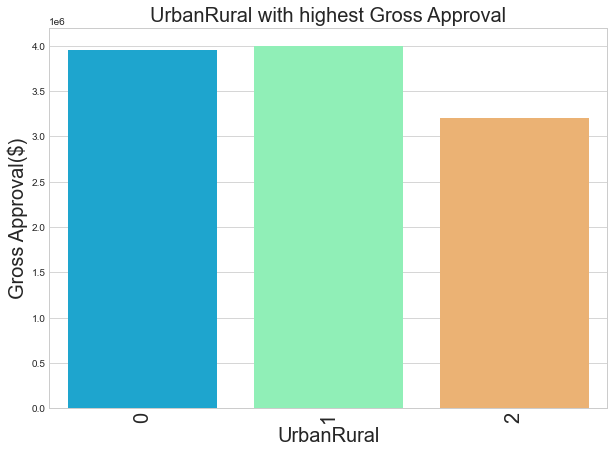

In [120]:
plot_gross2 = pd.DataFrame(loan.groupby(['UrbanRural'])['GrAppv'].max().sort_values(ascending=False)).reset_index()
plot_gross2 = plot_gross2[plot_gross2['GrAppv'] > 1000]  
plt.subplots(figsize=(10,7))
sns.barplot(x='UrbanRural',y='GrAppv',data=plot_gross2,palette='rainbow' )
plt.ylabel('Gross Approval($)', fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('UrbanRural', fontsize=20)
plt.title('UrbanRural with highest Gross Approval', fontsize=20)
plt.show()

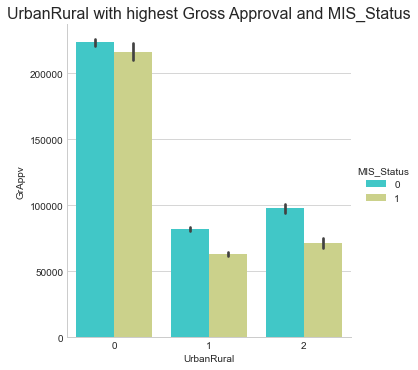

In [121]:
sns.catplot(x="UrbanRural", y="GrAppv",hue='MIS_Status', kind="bar", data=loan, palette='rainbow')
plt.title('UrbanRural with highest Gross Approval and MIS_Status', fontsize=16);

People staying in Rural with GrossApproval of less than `100000` are mostly falling under PIF as Compared to the Urban

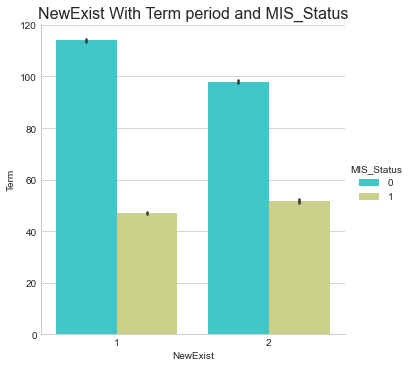

In [122]:
sns.catplot(x="NewExist", y="Term",hue='MIS_Status', kind="bar", data=loan , palette='rainbow')
plt.title('NewExist With Term period and MIS_Status', fontsize=16);

From the above graph we can see the people with Existing Bussiness with Term period of 120 & more falls under PIF

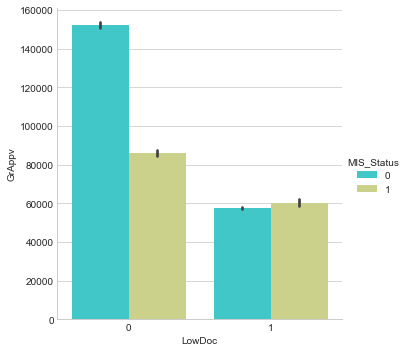

In [123]:
sns.catplot(x ='LowDoc', y='GrAppv',kind = 'bar', hue= 'MIS_Status', palette='rainbow', data = loan);

People with No LowDoc Loan Program are mostly under PIF 

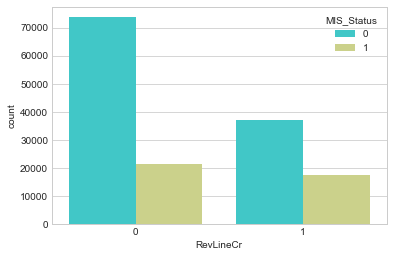

In [124]:
sns.countplot(data = loan, x = 'RevLineCr',  hue = 'MIS_Status', palette='rainbow' )
plt.show()

People with No Revolving Line of Credit fall more under PIF than the people with those.

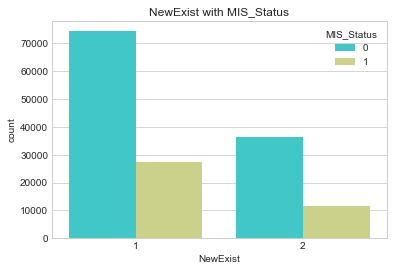

In [125]:
sns.countplot(data = loan, x = 'NewExist',  hue = 'MIS_Status', palette='rainbow' )
plt.title("NewExist with MIS_Status");


People with the Existing Business are more falling under PIF

In [126]:
#sns.catplot(x="Term", y="DisbursementGross", hue="MIS_Status", kind="bar", palette="rainbow", data=loan)

In [127]:
loan_final = loan.drop(["City","State","Bank","BankState","ApprovalDate","DisbursementDate","BalanceGross","NoEmp"], axis=1)
print(loan_final.head())
print(loan_final.shape)

     Zip    CCSC  ApprovalFY  Term  NewExist  CreateJob  RetainedJob  \
0  47711  451120        1997    84         2          0            0   
1  46526  722410        1997    60         2          0            0   
2  47401  621210        1997   180         1          0            0   
3  74012       0        1997    60         1          0            0   
4  32801       0        1997   240         1          7            7   

   UrbanRural  RevLineCr  LowDoc  DisbursementGross  MIS_Status  ChgOffPrinGr  \
0           0          0       1              60000           0             0   
1           0          0       1              40000           0             0   
2           0          0       0             287000           0             0   
3           0          0       1              35000           0             0   
4           0          0       0             229000           0             0   

   GrAppv  SBA_Appv  Franchisecode  
0   60000     48000              0  
1   40

In [128]:
loan_final

,Zip,CCSC,ApprovalFY,Term,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchisecode
0,47711,451120,1997,84,2,0,0,0,0,1,60000,0,0,60000,48000,0
1,46526,722410,1997,60,2,0,0,0,0,1,40000,0,0,40000,32000,0
2,47401,621210,1997,180,1,0,0,0,0,0,287000,0,0,287000,215250,0
3,74012,0,1997,60,1,0,0,0,0,1,35000,0,0,35000,28000,0
4,32801,0,1997,240,1,7,7,0,0,0,229000,0,0,229000,229000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,19604,621493,2007,32,1,0,13,1,1,0,142207,1,43074,100000,50000,0
149995,48111,236118,2007,24,1,3,5,2,1,0,39694,1,18812,20000,10000,0
149996,22032,541611,2007,84,1,2,4,1,0,0,100000,0,0,100000,50000,0
149997,43228,812990,2007,60,1,0,0,1,1,0,25000,0,0,25000,12500,0


In [129]:
x = loan_final.drop("MIS_Status", axis=1)  #independent columns
y = loan_final["MIS_Status"]    #target column i.e MIS_STATUS

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [131]:
#apply SelectKBest class to extract top 17 best features
bestfeatures = SelectKBest(score_func=f_classif , k=15)
fit = bestfeatures.fit(x,y)

In [132]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [133]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [134]:
print(featureScores.nlargest(15,"Score"))

             Features         Score
11       ChgOffPrinGr  35517.636852
3                Term  25477.143099
7          UrbanRural   5884.501530
2          ApprovalFY   3817.651926
13           SBA_Appv   2507.181004
9              LowDoc   2300.410028
12             GrAppv   2075.641517
1                CCSC   1998.805996
8           RevLineCr   1602.496876
10  DisbursementGross   1577.395280
14      Franchisecode    247.050030
4            NewExist    135.747652
6         RetainedJob     11.033002
0                 Zip      6.456127
5           CreateJob      0.311966


In [135]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
feature = model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01954721 0.01757299 0.04046844 0.24447359 0.0042624  0.00619312
 0.00885783 0.0329578  0.00603048 0.00639469 0.01702982 0.55596323
 0.01971648 0.01938769 0.00114423]


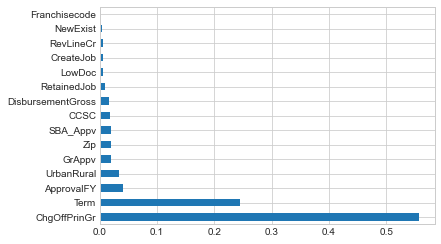

In [136]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

In [137]:
# Considering the Top 10 Features based on their Scores
loan_final_10 = loan_final.drop(["ChgOffPrinGr","RetainedJob","RevLineCr","CreateJob","NewExist","Franchisecode"],axis=1)
loan_final_10.head(), loan_final_10.shape

(     Zip    CCSC  ApprovalFY  Term  UrbanRural  LowDoc  DisbursementGross  \
 0  47711  451120        1997    84           0       1              60000   
 1  46526  722410        1997    60           0       1              40000   
 2  47401  621210        1997   180           0       0             287000   
 3  74012       0        1997    60           0       1              35000   
 4  32801       0        1997   240           0       0             229000   
 
    MIS_Status  GrAppv  SBA_Appv  
 0           0   60000     48000  
 1           0   40000     32000  
 2           0  287000    215250  
 3           0   35000     28000  
 4           0  229000    229000  ,
 (149757, 10))

In [138]:
loan_final_10 = loan_final_10[["Zip", "CCSC", "ApprovalFY","Term","UrbanRural","LowDoc","DisbursementGross","GrAppv","SBA_Appv","MIS_Status"]]
loan_final_10.columns.index = range(loan_final_10.shape[1])

### 1.Using SGDClassifier

In [139]:
# Lets Build a Model using the top 10 best features
x=loan_final_10.drop("MIS_Status",axis=1)
y=loan_final_10["MIS_Status"]

np.random.seed(42)

#Lets normalize the data
from sklearn import preprocessing

# Create a minimum and maximum processor object
#min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#x_normalized = pd.DataFrame(x_scaled)

# Lets Divide the Data in Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#x_test.to_csv(r'C:\Users\pravi\Desktop\new\x_test.csv')
#y_test.to_csv(r'C:\Users\pravi\Desktop\new\y_test.csv')

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
#y_preds_class = clf.predict(x_test)
sgd.score(x_test, y_test)

0.7341746794871795

In [140]:
SGD_Accuracy = sgd.score(x_test, y_test)

### The Accuracy Score of the Above Model is 0.73

In [141]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, x,y, cv=5)

array([0.38488248, 0.73707933, 0.73823912, 0.5566759 , 0.47036827])

In [142]:
from sklearn.metrics import roc_curve

sgd1 = SGDClassifier(loss="log")
# Fit the Classifier
sgd1.fit(x_train, y_train)

# Make predictons with probabilites
y_probs = sgd1.predict_proba(x_test)

y_probs_positive = y_probs[:,1]

# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive rates
fpr

array([0.        , 0.00990902, 1.        ])

### Lets Plot the ROC Curve

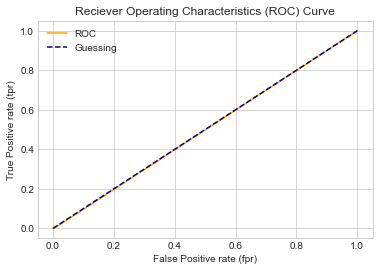

In [143]:
def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given a False Positive(fpr) and
    True Positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot the line with no Predictive Power(baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    #plt.text(score)
    plt.show()
    
plot_roc(fpr,tpr)

In [144]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_probs_positive)
score

0.498206781719752

### The Area under the Curve Using SGDClassifier is 0.49

#### Lets see the Confusion Matrix

In [145]:
from sklearn.metrics import confusion_matrix

y_preds_sgd = sgd.predict(x_test)

confusion_matrix(y_test, y_preds_sgd)

array([[21717,   485],
       [ 7477,   273]], dtype=int64)

In [146]:
pd.crosstab(y_test,
           y_preds_sgd,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21717,485
1,7477,273


#### Lets see the Classification Report



In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds_sgd))

              precision    recall  f1-score   support

           0       0.74      0.98      0.85     22202
           1       0.36      0.04      0.06      7750

    accuracy                           0.73     29952
   macro avg       0.55      0.51      0.45     29952
weighted avg       0.64      0.73      0.64     29952



In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_test, y_preds):
    """
    Performs Evaluation on y_true labels vs. y_preds labels
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision=precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                  "precision": round(precision, 2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 Score : {f1:.2f}")
    
    return metric_dict

In [149]:
SGDClass_evaluation = evaluate_preds(y_test, y_preds_sgd)
SGDClass_evaluation

Accuracy: 73.42%
Precision:0.36
Recall : 0.04
F1 Score : 0.06


{'accuracy': 0.73, 'precision': 0.36, 'recall': 0.04, 'f1': 0.06}

### 2. SVM

In [150]:
from sklearn import svm

np.random.seed(42)

# We have Already Normalized the Data so we can use the same set of train and test data for SVM
# Lets fit the model

SVM = svm.SVC()
SVM.fit(x_train, y_train)
y_preds_svm=SVM.predict(x_test)
SVM_Accuracy = SVM.score(x_test, y_test)
SVM_Accuracy

0.7412526709401709

### The Accuracy of SVM model is 0.74

In [151]:
# Make predictons with probabilites
SVM_proba = svm.SVC(probability=True)
SVM_proba.fit(x_train, y_train)
y_probs = SVM_proba.predict_proba(x_test)

y_probs_positive = y_probs[:,1]

# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive rates
fpr

array([0.00000000e+00, 4.50409873e-05, 2.25204936e-04, ...,
       9.97702910e-01, 9.99054139e-01, 1.00000000e+00])

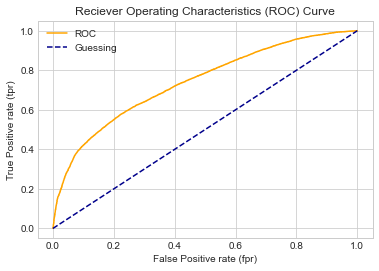

In [152]:
plot_roc(fpr, tpr)

In [153]:
score = roc_auc_score(y_test, y_probs_positive)
score

0.7397979316016283

#### Area under the Curve is 0.90

#### Confusion Matrix

In [154]:
confusion_matrix(y_test, y_preds_svm)

array([[22202,     0],
       [ 7750,     0]], dtype=int64)

In [155]:
pd.crosstab(y_test,y_preds_svm,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0
Actual Labels,
0,22202
1,7750


In [156]:
print(classification_report(y_test, y_preds_svm))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     22202
           1       0.00      0.00      0.00      7750

    accuracy                           0.74     29952
   macro avg       0.37      0.50      0.43     29952
weighted avg       0.55      0.74      0.63     29952



C:\Users\pravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [157]:
SVM_evaluation= evaluate_preds(y_test, y_preds_svm)
SVM_evaluation

Accuracy: 74.13%
Precision:0.00
Recall : 0.00
F1 Score : 0.00


C:\Users\pravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.74, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

### 3. K-Nearest Neighbour

In [223]:
np.random.seed(42)

# Lets Fit the K-Nearest Neighbour Algorithm

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_preds_knn = knn.predict(x_test)
KNNAccuracy = knn.score(x_test, y_test)
KNNAccuracy

0.7258947649572649

#### The Accuracy of K-Nearest Neighbor Model is 0.72

In [159]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [160]:
# Lets Check the Accuracy with 10 neighbors

knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(x_train, y_train)
knn1.score(x_test, y_test)

0.7420873397435898

In [162]:
cross_val_score(knn, x,y, cv=5)

array([0.70963542, 0.71507746, 0.72835632, 0.73176188, 0.7250843 ])

In [163]:
# Make predictons with probabilites
y_probs = knn.predict_proba(x_test)

y_probs_positive = y_probs[:,1]

# Calculate FPR, TPR and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the False Positive rates
fpr

array([0.        , 0.00576525, 0.03832988, 0.13097919, 0.31816953,
       0.6039546 , 1.        ])

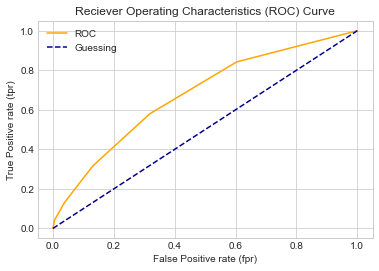

In [164]:
plot_roc(fpr,tpr)

In [165]:
score = roc_auc_score(y_test, y_probs_positive)
score

0.6756566627243695

#### The Area under the Curve for this model is 0.92

In [166]:
confusion_matrix(y_test, y_preds_knn)

array([[19294,  2908],
       [ 5302,  2448]], dtype=int64)

In [167]:
pd.crosstab(y_test,
           y_preds_knn,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,19294,2908
1,5302,2448


In [168]:
print(classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     22202
           1       0.46      0.32      0.37      7750

    accuracy                           0.73     29952
   macro avg       0.62      0.59      0.60     29952
weighted avg       0.70      0.73      0.71     29952



In [169]:
knn_evaluation = evaluate_preds(y_test, y_preds_knn)
knn_evaluation

Accuracy: 72.59%
Precision:0.46
Recall : 0.32
F1 Score : 0.37


{'accuracy': 0.73, 'precision': 0.46, 'recall': 0.32, 'f1': 0.37}

# 4.Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier

ranf=RandomForestClassifier(n_estimators=100, n_jobs=-1)

ranf_fit=ranf.fit(x_train, y_train)
y_preds_ranf=ranf.predict(x_test)
RandomForestAccuracy = ranf_fit.score(x_test, y_test)
RandomForestAccuracy

0.9451789529914529

In [222]:
print("Accuracy:",accuracy_score(y_test,y_preds_ranf))

Accuracy: 0.9451789529914529


In [172]:
cross_val_score(ranf, x,y, cv=5)

array([0.94260817, 0.93452858, 0.94377483, 0.94320724, 0.9377984 ])

In [173]:

y_prob2 = ranf.predict_proba(x_test)

y_prob2_positive = y_prob2[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob2_positive)

#False Positive rates
fpr


array([0.00000000e+00, 6.75614809e-04, 1.08098370e-03, 2.02684443e-03,
       3.06278714e-03, 3.73840195e-03, 4.72930367e-03, 5.63012341e-03,
       6.21565625e-03, 6.98135303e-03, 8.15241870e-03, 9.05323845e-03,
       9.86397622e-03, 1.07197550e-02, 1.13052878e-02, 1.19358616e-02,
       1.24313125e-02, 1.29718043e-02, 1.35573372e-02, 1.46383209e-02,
       1.50436898e-02, 1.56292226e-02, 1.63949194e-02, 1.70254932e-02,
       1.75659850e-02, 1.82415999e-02, 1.89622557e-02, 1.95477885e-02,
       2.03134853e-02, 2.10791821e-02, 2.17998379e-02, 2.22502477e-02,
       2.27907396e-02, 2.36915593e-02, 2.42770922e-02, 2.47725430e-02,
       2.54031168e-02, 2.59436087e-02, 2.64841005e-02, 2.71146744e-02,
       2.80605351e-02, 2.87361499e-02, 2.97720926e-02, 3.03576254e-02,
       3.13935681e-02, 3.19791010e-02, 3.29700027e-02, 3.38257815e-02,
       3.49518061e-02, 3.58976669e-02, 3.68435276e-02, 3.76092244e-02,
       3.87802901e-02, 3.95459868e-02, 4.05368886e-02, 4.21133231e-02,
      

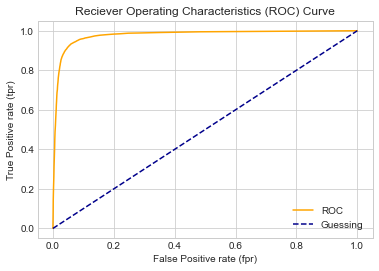

In [174]:
plot_roc(fpr,tpr)

In [175]:
score = roc_auc_score(y_test, y_prob2_positive)
score

0.9774829265599436

In [176]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_ranf)

array([[21384,   818],
       [  854,  6896]], dtype=int64)

In [177]:
pd.crosstab(y_test,
           y_preds_ranf,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21384,818
1,854,6896


In [178]:
print(classification_report(y_test, y_preds_ranf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22202
           1       0.89      0.89      0.89      7750

    accuracy                           0.94     29952
   macro avg       0.93      0.93      0.93     29952
weighted avg       0.94      0.94      0.94     29952



In [179]:
ranf_evaluation = evaluate_preds(y_test, y_preds_ranf)
ranf_evaluation

Accuracy: 94.42%
Precision:0.89
Recall : 0.89
F1 Score : 0.89


{'accuracy': 0.94, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

## 5. Randomized Search CV

### The main parameters used by a Random Forest Classifier are:

- criterion = the function used to evaluate the quality of a split.
- max_depth = maximum number of levels allowed in each tree.
- max_features = maximum number of features considered when splitting a node.
- min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
- min_samples_split = minimum number of samples necessary in a node to cause node splitting.
- n_estimators = number of trees in the ensamble.

In [180]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [181]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=20,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 76.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=100, verbose=2)

In [182]:
rf_randomcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [183]:
best_random_grid=rf_randomcv.best_estimator_

In [210]:
ranf_new = RandomForestClassifier(n_estimators = 300,min_samples_split = 2, min_samples_leaf = 1, max_depth = 120, criterion = 'entropy', n_jobs=-1 ).fit(x_train, y_train)

In [216]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_preds_ranf_ransearchcv=ranf_new.predict(x_test)
RandomSearchcvAccuracy = accuracy_score(y_test,y_preds_ranf_ransearchcv)
print(confusion_matrix(y_test,y_preds_ranf_ransearchcv))
print("Accuracy Score {}".format(accuracy_score(y_test,y_preds_ranf_ransearchcv)))
print("Classification report: {}".format(classification_report(y_test,y_preds_ranf_ransearchcv)))
ranf_ransearchcv_evaluation = evaluate_preds(y_test, y_preds_ranf_ransearchcv)
ranf_ransearchcv_evaluation

[[21380   822]
 [  827  6923]]
Accuracy Score 0.9449452457264957
Classification report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96     22202
           1       0.89      0.89      0.89      7750

    accuracy                           0.94     29952
   macro avg       0.93      0.93      0.93     29952
weighted avg       0.94      0.94      0.94     29952

Accuracy: 94.49%
Precision:0.89
Recall : 0.89
F1 Score : 0.89


{'accuracy': 0.94, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

In [212]:
y_prob3 = best_random_grid.predict_proba(x_test)

y_prob3_positive = y_prob3[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob3_positive)

#False Positive rates
fpr


array([0.00000000e+00, 9.00819746e-05, 2.25204936e-04, 5.40491848e-04,
       7.20655797e-04, 7.65696784e-04, 1.03594271e-03, 1.30618863e-03,
       1.57643456e-03, 1.93676245e-03, 2.07188542e-03, 2.25204936e-03,
       2.83758220e-03, 3.24295109e-03, 3.46815602e-03, 3.91856589e-03,
       4.00864787e-03, 4.09872984e-03, 4.18881182e-03, 4.54913972e-03,
       5.08963156e-03, 5.22475453e-03, 5.58508243e-03, 5.67516440e-03,
       5.99045131e-03, 6.48590217e-03, 6.93631204e-03, 7.38672192e-03,
       7.79209080e-03, 7.97225475e-03, 8.24250068e-03, 8.46770561e-03,
       8.73795154e-03, 9.00819746e-03, 9.32348437e-03, 9.68381227e-03,
       9.95405819e-03, 1.02693451e-02, 1.05395910e-02, 1.07647960e-02,
       1.09900009e-02, 1.11251239e-02, 1.12152058e-02, 1.13503288e-02,
       1.16205747e-02, 1.18457797e-02, 1.21610666e-02, 1.23412305e-02,
       1.24763535e-02, 1.27916404e-02, 1.30618863e-02, 1.33321322e-02,
       1.36023782e-02, 1.39176651e-02, 1.40527880e-02, 1.41428700e-02,
      

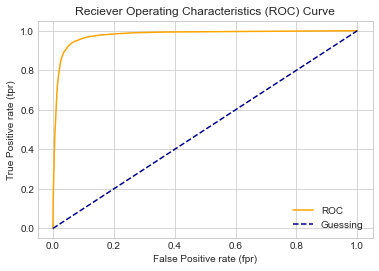

In [213]:
plot_roc(fpr,tpr)

In [214]:
score = roc_auc_score(y_test, y_prob3_positive)
score

0.9784710938567001

## 6. Lets implement the SMOTE function and see the results

In [188]:
loan_final

,Zip,CCSC,ApprovalFY,Term,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Franchisecode
0,47711,451120,1997,84,2,0,0,0,0,1,60000,0,0,60000,48000,0
1,46526,722410,1997,60,2,0,0,0,0,1,40000,0,0,40000,32000,0
2,47401,621210,1997,180,1,0,0,0,0,0,287000,0,0,287000,215250,0
3,74012,0,1997,60,1,0,0,0,0,1,35000,0,0,35000,28000,0
4,32801,0,1997,240,1,7,7,0,0,0,229000,0,0,229000,229000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,19604,621493,2007,32,1,0,13,1,1,0,142207,1,43074,100000,50000,0
149995,48111,236118,2007,24,1,3,5,2,1,0,39694,1,18812,20000,10000,0
149996,22032,541611,2007,84,1,2,4,1,0,0,100000,0,0,100000,50000,0
149997,43228,812990,2007,60,1,0,0,1,1,0,25000,0,0,25000,12500,0


In [191]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

# Lets Normalize the Data and then split it into train and test sets

x_all = loan_final.drop(["MIS_Status","ChgOffPrinGr"], axis=1)
y_all = loan_final["MIS_Status"]

# Create a minimum and maximum processor object
#min_max_scaler_all = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_all_scaled = min_max_scaler_all.fit_transform(x_all)

# Run the normalizer on the dataframe
#x_all_normalized = pd.DataFrame(x_all_scaled)

# Lets Divide the Data in Train and Test Set
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(x_all,y_all, test_size=0.2)


In [192]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_all_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_all_train == 0))) 

Before OverSampling, counts of label '1': 31271
Before OverSampling, counts of label '0': 88534 



In [193]:
#import SMOTE module from imblearn library 
#pip install imblearn (if you don't have imblearn in your system) 

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(x_all_train, y_all_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (177068, 14)
After OverSampling, the shape of train_y: (177068,) 

After OverSampling, counts of label '1': 88534
After OverSampling, counts of label '0': 88534


In [194]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
random_search_smote=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,n_jobs=-1,verbose=2)
random_search_smote.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 38.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 55.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [221]:
sm_rm_pred = random_search_smote.predict(x_all_test)
SMOTEAccuracy = accuracy_score(y_all_test, sm_rm_pred)
print(pd.crosstab(y_all_test,
           sm_rm_pred,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"]))
smote_randomsearchcv_evaluation =evaluate_preds(y_all_test, sm_rm_pred) 
#print(confusion_matrix(y_test,y_pred_ranf_gridsearchcv))
print("Accuracy Score {}".format(accuracy_score(y_all_test, sm_rm_pred)))
print("Classification report: {}".format(classification_report(y_all_test, sm_rm_pred)))

Predicted Labels      0     1
Actual Labels                
0                 21007  1290
1                   649  7006
Accuracy: 93.53%
Precision:0.84
Recall : 0.92
F1 Score : 0.88
Accuracy Score 0.9352630876068376
Classification report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96     22297
           1       0.84      0.92      0.88      7655

    accuracy                           0.94     29952
   macro avg       0.91      0.93      0.92     29952
weighted avg       0.94      0.94      0.94     29952



In [196]:
y_prob4 = random_search_smote.predict_proba(x_all_test)

y_prob4_positive = y_prob4[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob4_positive)

#False Positive rates
fpr


array([0.00000000e+00, 4.50409873e-05, 9.00819746e-05, ...,
       9.98738852e-01, 9.99189262e-01, 1.00000000e+00])

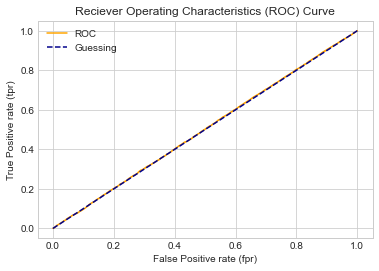

In [197]:
plot_roc(fpr,tpr)

In [198]:
score = roc_auc_score(y_test, y_prob4_positive)
score

0.5020318890190073

# 7. XGB classifier

In [200]:
x=loan_final_10.drop("MIS_Status",axis=1)
y=loan_final_10["MIS_Status"]

np.random.seed(42)

#Lets normalize the data
from sklearn import preprocessing

# Create a minimum and maximum processor object
#min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
#x_normalized = pd.DataFrame(x_scaled)

# Lets Divide the Data in Train and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [201]:
import xgboost as xgb
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.7),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 2, 3, 4]
             }

# param_dist = {'max_depth':[1,2,3,4],
#              'gamma':[0, 0.5, 1],
#              'n_estimators': randint(5,1001),
#              'learning_rate':uniform(),
#              'subsample':uniform(),
#              'colsample_bytree':uniform()
#              }


clf_xgbclassifier = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 7,  
                         n_iter = 15,
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)


In [202]:
clf_xgbclassifier.fit(x_train, y_train)

Fitting 7 folds for each of 15 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed: 48.9min finished


RandomizedSearchCV(cv=7, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_e...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D30D20B5C8>,
                                        'max_de

In [203]:
best_param = clf_xgbclassifier.best_params_
best_param

{'learning_rate': 0.07377688876097478,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 296,
 'subsample': 0.6710758444459088}

In [204]:
best_xgb = clf_xgbclassifier.best_estimator_

In [218]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_preds_xgb_ransearchcv=best_xgb.predict(x_test)
XGBAccuracy = accuracy_score(y_test,y_preds_xgb_ransearchcv)
print(confusion_matrix(y_test,y_preds_xgb_ransearchcv))
print("Accuracy Score {}".format(accuracy_score(y_test,y_preds_xgb_ransearchcv)))
print("Classification report: {}".format(classification_report(y_test,y_preds_xgb_ransearchcv)))

xgb_ransearchcv_evaluation = evaluate_preds(y_test, y_preds_xgb_ransearchcv)
xgb_ransearchcv_evaluation

[[21485   717]
 [  769  6981]]
Accuracy Score 0.9503872863247863
Classification report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97     22202
           1       0.91      0.90      0.90      7750

    accuracy                           0.95     29952
   macro avg       0.94      0.93      0.94     29952
weighted avg       0.95      0.95      0.95     29952

Accuracy: 95.04%
Precision:0.91
Recall : 0.90
F1 Score : 0.90


{'accuracy': 0.95, 'precision': 0.91, 'recall': 0.9, 'f1': 0.9}

In [206]:
y_prob5 = best_xgb.predict_proba(x_test)

y_prob5_positive = y_prob5[:,1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob5_positive)

#False Positive rates
fpr


array([0.        , 0.        , 0.        , ..., 0.99279344, 0.99288352,
       1.        ])

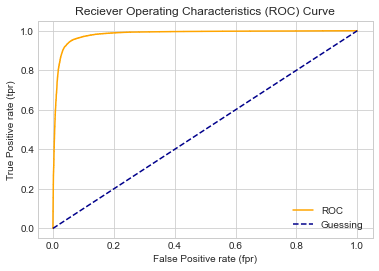

In [207]:
plot_roc(fpr,tpr)

In [208]:
score = roc_auc_score(y_test, y_prob5_positive)
score

0.9825128831753024

# Lets compare all the Models Evaluations

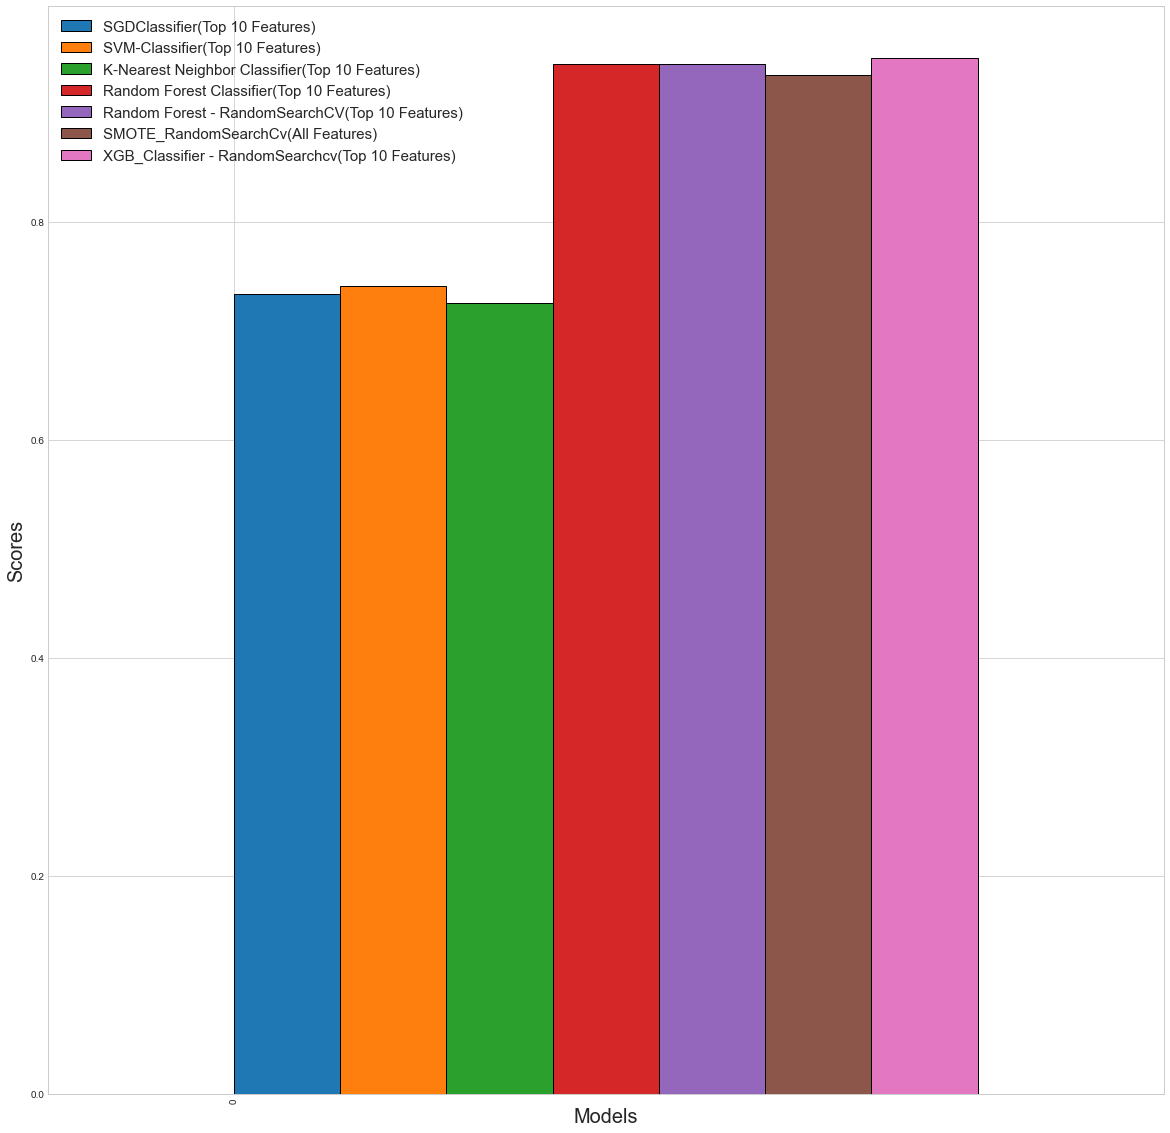

In [234]:
modelacc = pd.DataFrame({"SGDClassifier(Top 10 Features)": [SGD_Accuracy],
                               "SVM-Classifier(Top 10 Features)": [SVM_Accuracy],
                               "K-Nearest Neighbor Classifier(Top 10 Features)": [KNNAccuracy],
                               "Random Forest Classifier(Top 10 Features)": [RandomForestAccuracy],
                               "Random Forest - RandomSearchCV(Top 10 Features)":[RandomSearchcvAccuracy],
                                "SMOTE_RandomSearchCv(All Features)": [SMOTEAccuracy],
                               "XGB_Classifier - RandomSearchcv(Top 10 Features)" : [XGBAccuracy]})
modelacc.plot.bar(align='edge', width=1,figsize=(20,20),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);

In [225]:
SGD_Accuracy

0.7341746794871795

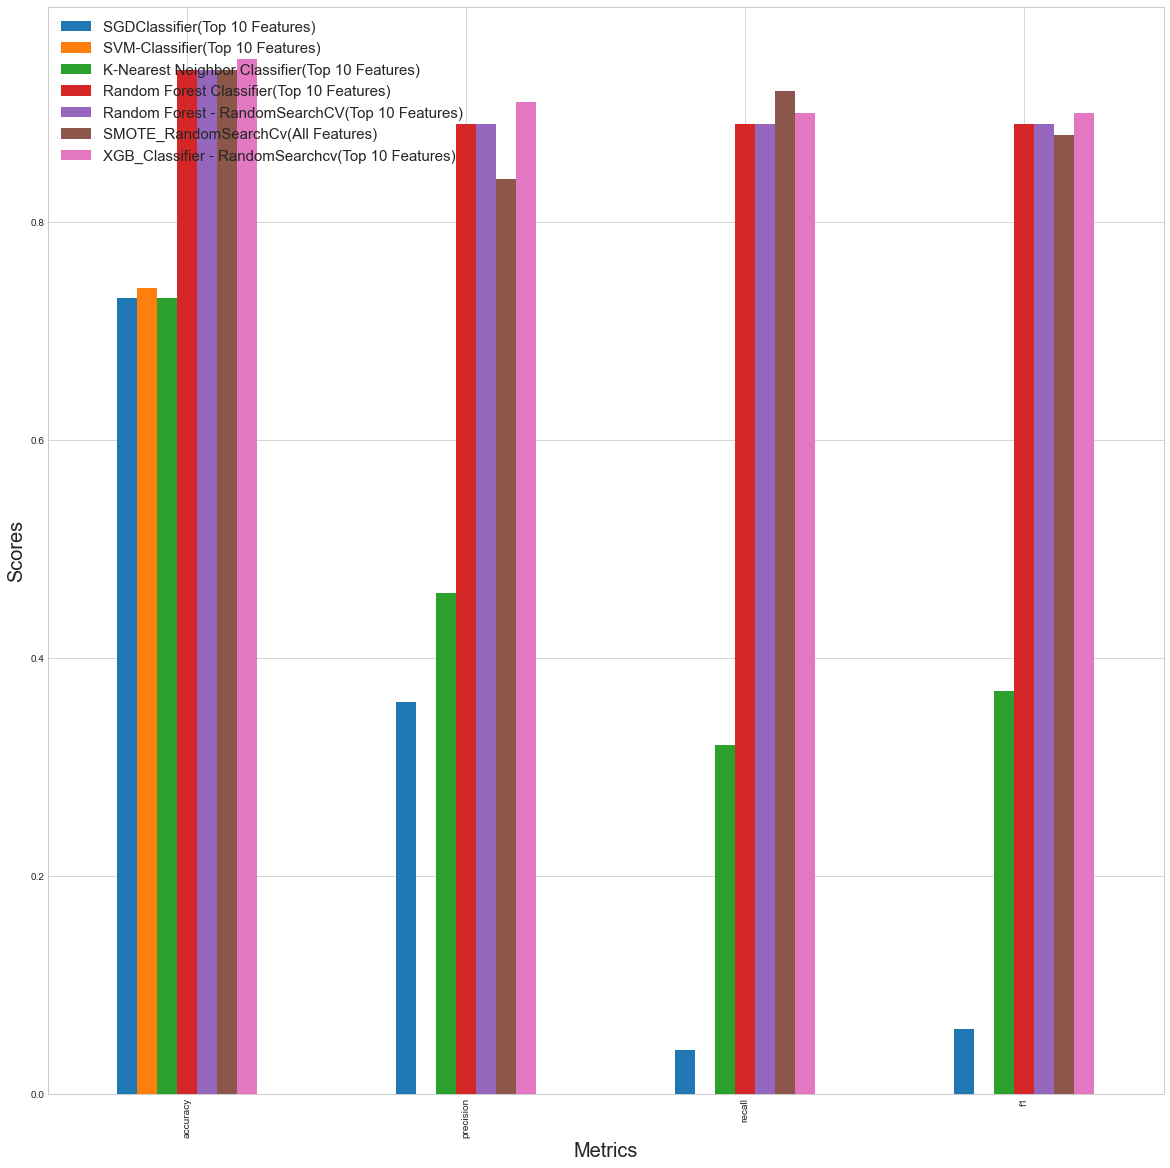

In [236]:
compare_metrics = pd.DataFrame({"SGDClassifier(Top 10 Features)": SGDClass_evaluation,
                               "SVM-Classifier(Top 10 Features)": SVM_evaluation,
                               "K-Nearest Neighbor Classifier(Top 10 Features)": knn_evaluation,
                               "Random Forest Classifier(Top 10 Features)": ranf_evaluation,
                               "Random Forest - RandomSearchCV(Top 10 Features)":ranf_ransearchcv_evaluation,
                                "SMOTE_RandomSearchCv(All Features)": smote_randomsearchcv_evaluation,
                               "XGB_Classifier - RandomSearchcv(Top 10 Features)" : xgb_ransearchcv_evaluation})

compare_metrics.plot.bar(figsize=(20,20));
plt.xlabel('Metrics', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);

In [237]:
#Saving a model

import pickle

pickle.dump(ranf_new, open('ranf.pkl','wb'))

#pickle.dump(ranf_fit,open('randomforest.pkl', 'wb'))

pickle.dump(best_xgb,open('xgbclassifier1.pkl','wb'))

#pickle.dump(best_random_grid,open('randomizedsearch.pkl','wb'))


In [ ]:
#load model

#model = pickle.load(open('clf_xgbclassifier.pkl','rb'))
#model = pickle.load(open('randomizedsearch.pkl','rb'))